### Invert BST 
https://leetcode.com/problems/invert-binary-tree/description/

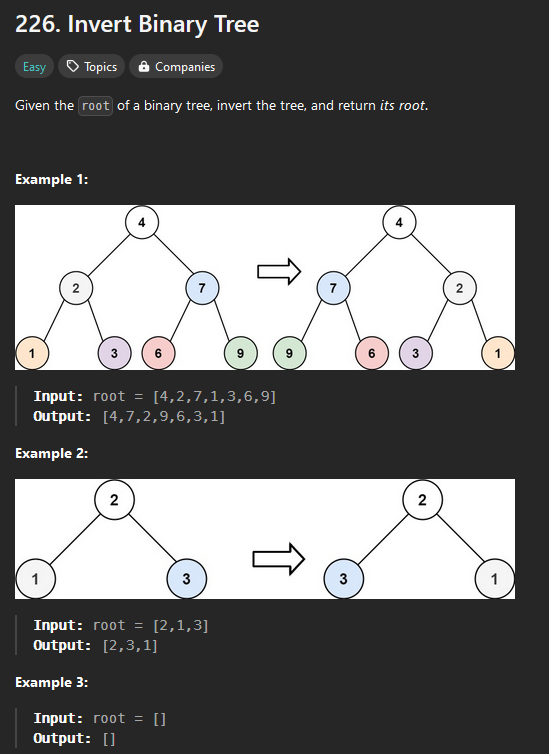

In [1]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def list_to_bin_tree(l):
    if not l:
        return None

    root = Node(l.pop(0))
    queue = [root]

    while queue:
        node = queue.pop(0)

        if l:
            left_val = l.pop(0)
            if left_val != None:
                node.left = Node(left_val)
                queue.append(node.left)

        if l:
            right_val = l.pop(0)
            if right_val != None:
                node.right = Node(right_val)
                queue.append(node.right)

    return root


def bin_tree_to_list(root):
    l = []
    if not root:
        return l
    queue = [root]

    while queue:
        node = queue.pop(0)
        l.append(node.val)
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

    return l

# Uses post order traversal to ensure that left/right subtrees 
# of any node are processed before their parent node

# Time: O(n) - need to traverse all nodes
# Space: O(1) - since only one var created 
#   + Best Case (balanced Tree) O(logn)
#   or + Worst Case (unbalanced) O(n) 
# Reminder we are using stack space for recursion
def invert_BST(root):
    # if root == None return 
    if not root: return root
    
    # switch left and right subtrees
    
    # store left subtree into temp val
    temp = root.left
    root.left = root.right
    root.right = temp
    
    invert_BST(root.left)
    invert_BST(root.right)
    
    # return root at the end since root node does not change
    return root


def test_solution():
    tests = [
        {"input": [], "output": []},
        {"input": [2,1,3], "output": [2,3,1]},
        {"input": [4,2,7,1,3,6,9], "output": [4,7,2,9,6,3,1]}
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            bin_tree_to_list(invert_BST(list_to_bin_tree(tests[i]["input"])))
            == tests[i]["output"] 
        )

In [2]:
test_solution()

Test 1 Pass: True
Test 2 Pass: True
Test 3 Pass: True
